In [59]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import re
import pypdf

In [60]:
# DOES NOT WORK

# qurl = "https://hsquizbowl.org/db/packets/college/"
# # Get the links to packets for all tournaments
# r = requests.get(qurl)
# soup = BeautifulSoup(r.text, 'html.parser')
# # Get links to packets for all tournaments, that is qurl+hrefnum
# links = [qurl + link.get('href') for link in soup.find_all('a') if link.get('href')[:-1].isdigit()]

# print(links)

In [100]:
# scan pdf

# Get the text from the pdf
pdflink = "https://files.quizbowlpackets.com/2937/Emergency%201.%20UMN%20A,%20South%20Carolina%20A,%20JHU%20B.pdf"
r = requests.get(pdflink)
with open("packet.pdf", 'wb') as f:
    f.write(r.content)


In [108]:
pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
text = ""
for page in pdf.pages:
    # if any word is "Bonuses", then stop
    if (("Bonuses" in page.extract_text()) or ("B O N U S E S" in page.extract_text())):
        print("found bonuses")
        break

    text += page.extract_text()
    # remove newlines
    text = text.replace("\n", " ")

categories = {}

# if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary before we encounter the word "bonuses"

for match in re.findall(r'<(.*?)>', text):
    if match not in categories:
        categories[match] = 1
    else:
        categories[match] += 1

print(categories)

print(sum(categories.values()))

found bonuses
{'European Literature': 1, 'American History': 1, 'British Literature': 1, 'Physics': 1, 'Painting & Sculpture': 1, 'Social Science': 1, 'World History': 1, 'Other Academic': 1, 'Religion': 1, 'Other Science': 1, 'Other Fine Arts': 1, 'Chemistry': 1, 'Classical Music': 1, 'Other History': 1, 'World Literature': 1, 'Philosophy': 1, 'Biology': 1, 'American Literature': 1, 'Geography': 1, 'European History': 1}
20


In [109]:
os.remove("packet.pdf")

In [123]:
# We will do the same for packets from the links file and then plot the frequency of each category
# Read packets from the links
# For each packet, get the text
# For each packet, get the categories
# For each category, add to dictionary
# delete packet

with open('links.txt', 'r') as f:
    links = f.read()
links = links.split('\n')

categories = {}

for link in links:
    r = requests.get(link)
    with open("packet.pdf", 'wb') as f:
        f.write(r.content)

    pdf = pypdf.PdfReader(open("packet.pdf", "rb"))
    text = ""
    for page in pdf.pages:
        # if first word is "Bonuses", then stop

        if (("Bonuses" in page.extract_text()) or ("B O N U S E S" in page.extract_text())) or ("bonuses" in page.extract_text()) or ("BONUSES" in page.extract_text()):
            break
        text += page.extract_text()

    text = text.replace("\n", " ")

    # if any part of the text is of the form "<sometext>", then it is a category and we add it to the dictionary

    for match in re.findall(r'<(.*?)>', text):
        if match not in categories:
            categories[match] = 1
        else:
            categories[match] += 1

    # delete packet
    os.remove("packet.pdf")

print(categories)

{'Religion': 160, 'European History': 159, 'Chemistry': 161, 'World History': 158, 'Mythology': 121, 'Other Fine Arts': 139, 'European Literature': 161, 'Social Science': 149, 'Physics': 158, 'American Literature': 145, 'Biology': 162, 'Painting and Sculpture': 17, 'World Literature': 113, 'American History': 148, 'Philosophy': 145, 'Classical Music': 159, 'British Literature': 161, 'Other History': 149, 'Other Science': 134, 'Geography': 60, 'Other Academic': 36, 'Current Events': 59, 'Pop Culture': 32, 'Painting/Sculpture': 119, 'World/Other Literature': 44, 'Painting & Sculpture': 25, 'Ancient History': 11, 'Misc. Science': 23, 'Am erican History': 1, 'Mythology/Leg ends': 1, 'Other Fin e Arts': 1, 'Mythology/Legends': 12, 'European Hist ory': 1, 'Social Sc ience': 1, 'World Li terature': 1, 'Classic al Music': 1, 'Phy sics': 1, 'European Litera ture': 1, 'European Li terature': 1, 'Mythology/Legen ds': 1, 'World Histo ry': 1, 'Religion ': 1, 'British  Literature': 1, 'Soci al Scien

In [124]:
print(sum(categories.values()))

3208


{'Biology': 162, 'Chemistry': 161, 'European Literature': 161, 'British Literature': 161, 'Religion': 160, 'European History': 159, 'Classical Music': 159, 'World History': 158, 'Physics': 158, 'Social Science': 149, 'Other History': 149, 'American History': 148, 'American Literature': 145, 'Philosophy': 145, 'Other Fine Arts': 139, 'Other Science': 134, 'Mythology': 121, 'Painting/Sculpture': 119, 'World Literature': 113, 'Geography': 60, 'Current Events': 59, 'World/Other Literature': 44, 'Other Academic': 36, 'Pop Culture': 32, 'Painting & Sculpture': 25, 'Misc. Science': 23, 'CE/Geo/Other/Pop Culture': 18, 'Other Arts': 18, 'Painting and Sculpture': 17, 'US History': 14, 'US Literature': 14, 'Mythology/Legends': 12, 'Ancient History': 11, 'Am erican History': 1, 'Mythology/Leg ends': 1, 'Other Fin e Arts': 1, 'European Hist ory': 1, 'Social Sc ience': 1, 'World Li terature': 1, 'Classic al Music': 1, 'Phy sics': 1, 'European Litera ture': 1, 'European Li terature': 1, 'Mythology/Le

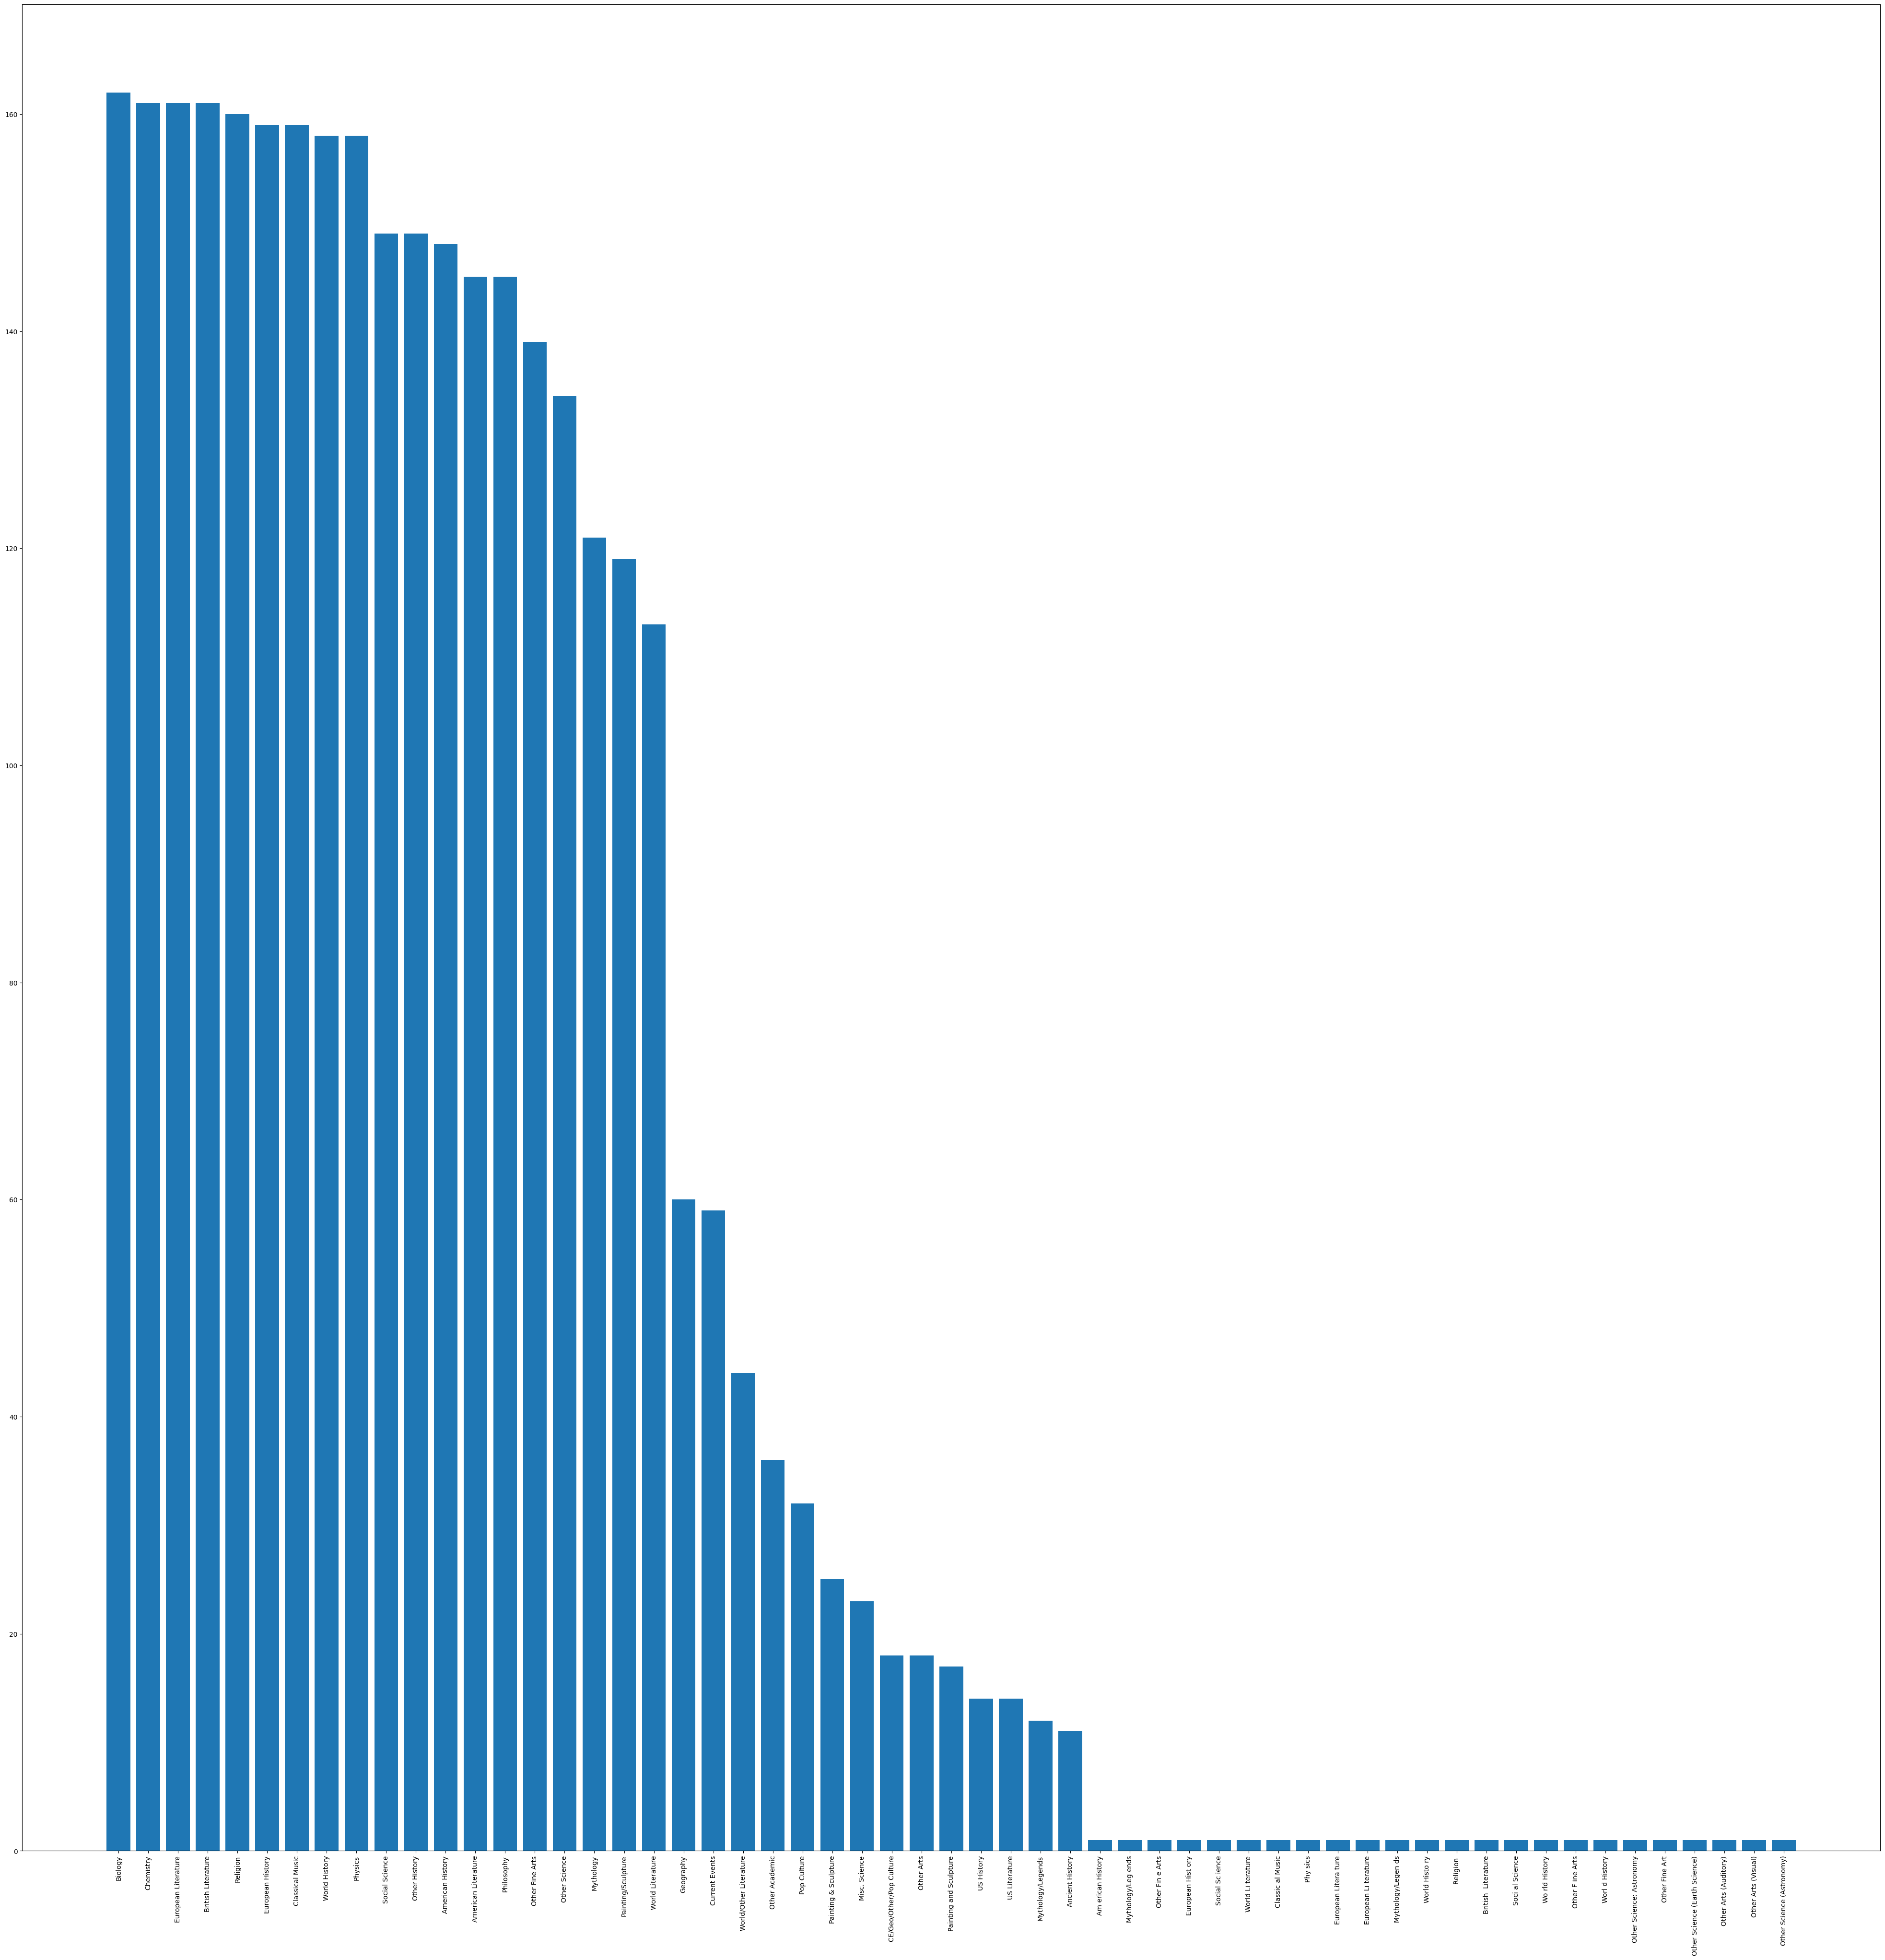

In [125]:
# Plot the frequency of each category
# Sort the dictionary by value
sorted_categories = sorted(categories.items(), key=lambda x: x[1], reverse=True)
sorted_categories = dict(sorted_categories)
print(sorted_categories)

# Plot all categories
plt.figure(figsize=(50, 50))
plt.bar(range(len(sorted_categories)), list(sorted_categories.values()), align='center')
plt.xticks(range(len(sorted_categories)), list(sorted_categories.keys()))
plt.xticks(rotation=90)
plt.savefig('all_categories.png')
plt.show()
